In [4]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
from varname import nameof

In [5]:
general = pd.read_csv("../data/Food_production.csv")
general.isna().sum()

Food product                                                                0
Land use change                                                             0
Animal Feed                                                                 0
Farm                                                                        0
Processing                                                                  0
Transport                                                                   0
Packging                                                                    0
Retail                                                                      0
Total_emissions                                                             0
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   10
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                    5
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      16
Freshwater withdrawals per 1000kcal (liters per 1000kcal)       

In [6]:
general.shape

(43, 23)

In [7]:
# The units are liters (l): https://ourworldindata.org/environmental-impacts-of-food?country=#water-use

land_use_kcal = pd.read_csv("../data/Resources_use/land-use-kcal-poore.csv").drop(["Code", "Year"], axis = 1)
land_use_kg = pd.read_csv("../data/Resources_use/land-use-per-kg-poore.csv").drop(["Code", "Year"], axis = 1)
land_use_protein = pd.read_csv("../data/Resources_use/land-use-protein-poore.csv").drop(["Code", "Year"], axis = 1)

land_use = pd.merge(land_use_kcal, land_use_kg, how = "outer", on = "Entity")
land_use = pd.merge(land_use, land_use_protein, how = "outer", on = "Entity")
land_use.columns = ["Entity", "Land use per 1000kcal", "Land use per kg", "Land use per 100g protein"]
land_use.head()

,Entity,Land use per 1000kcal,Land use per kg,Land use per 100g protein
0,Apples,1.312500,0.63,21.000000
1,Bananas,3.216667,1.93,21.444444
2,Barley,0.222000,1.11,NaN
3,Beef (beef herd),119.490842,326.21,163.595787
4,Beef (dairy herd),15.838828,43.24,21.904762


In [8]:
# The units are squared meters (m2): https://ourworldindata.org/environmental-impacts-of-food?country=#water-use

water_use_kcal = pd.read_csv("../data/Resources_use/freshwater-withdrawals-per-kcal.csv").drop(["Code", "Year"], axis = 1)
water_use_kg = pd.read_csv("../data/Resources_use/freshwater-withdrawals-per-kg.csv").drop(["Code", "Year"], axis = 1)
water_use_protein = pd.read_csv("../data/Resources_use/freshwater-withdrawals-per-protein.csv").drop(["Code", "Year"], axis = 1)

water_use = pd.merge(water_use_kcal, water_use_kg, how = "outer", on = "Entity")
water_use = pd.merge(water_use, water_use_protein, how = "outer", on = "Entity")
water_use.columns = ["Entity", "Freswater withdrawls per 1000kcal", "Freswater withdrawls per kg", "Freswater withdrawls per 100g protein"]
water_use.head()

,Entity,Freswater withdrawls per 1000kcal,Freswater withdrawls per kg,Freswater withdrawls per 100g protein
0,Apples,375.208333,180.1,6003.333333
1,Bananas,190.833333,114.5,1272.222222
2,Barley,3.420000,17.1,NaN
3,Beef (beef herd),531.575092,1451.2,727.783350
4,Beef (dairy herd),994.249084,2714.3,1375.025329


In [9]:
general = pd.read_csv("../data/Food_production.csv")
general = general[["Food product", "Total_emissions"]]
general.columns = ["Entity", "Total_emissions"]
general.head()

,Entity,Total_emissions
0,Wheat & Rye (Bread),1.4
1,Maize (Meal),1.1
2,Barley (Beer),1.1
3,Oatmeal,1.6
4,Rice,4.0


In [10]:
resources = pd.merge(general, land_use, how = "outer", on = "Entity")
resources = pd.merge(resources, water_use, how = "outer", on = "Entity")
resources.head()

,Entity,Total_emissions,Land use per 1000kcal,Land use per kg,Land use per 100g protein,Freswater withdrawls per 1000kcal,Freswater withdrawls per kg,Freswater withdrawls per 100g protein
0,Wheat & Rye (Bread),1.4,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),1.1,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),1.1,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,1.6,2.897446,7.6,5.846154,183.911552,482.4,371.076923
4,Rice,4.0,0.759631,2.8,3.943662,609.983722,2248.4,3166.760563


In [11]:
def landuse_prep(path):

    # I pull the data and do some manipulation
    land_use_kcal = pd.read_csv(path + "/land-use-kcal-poore.csv").drop(["Code", "Year"], axis = 1)
    land_use_kg = pd.read_csv(path + "/land-use-per-kg-poore.csv").drop(["Code", "Year"], axis = 1)
    land_use_protein = pd.read_csv(path + "/land-use-protein-poore.csv").drop(["Code", "Year"], axis = 1)

    # Merge the data into one dataframe
    land_use = pd.merge(land_use_kcal, land_use_kg, how = "outer", on = "Entity")
    land_use = pd.merge(land_use, land_use_protein, how = "outer", on = "Entity")

    # Rename the columns
    land_use.columns = ["Entity", "Land use per 1000kcal", "Land use per kg", "Land use per 100g protein"]

    return land_use

In [12]:
def wateruse_prep(path):

    # I pull the data and do some manipulation
    water_use_kcal = pd.read_csv(path + "/freshwater-withdrawals-per-kcal.csv").drop(["Code", "Year"], axis = 1)
    water_use_kg = pd.read_csv(path + "/freshwater-withdrawals-per-kg.csv").drop(["Code", "Year"], axis = 1)
    water_use_protein = pd.read_csv(path + "/freshwater-withdrawals-per-protein.csv").drop(["Code", "Year"], axis = 1)

    # Merge the data into one dataframe
    water_use = pd.merge(water_use_kcal, water_use_kg, how = "outer", on = "Entity")
    water_use = pd.merge(water_use, water_use_protein, how = "outer", on = "Entity")

    # Rename the columns
    water_use.columns = ["Entity", "Freswater withdrawls per 1000kcal", "Freswater withdrawls per kg", "Freswater withdrawls per 100g protein"]
    
    return water_use

In [13]:
def general_prep(path):
    general = pd.read_csv(path + "/Food_production.csv")
    general = general[["Food product", "Total_emissions"]]
    general.columns = ["Entity", "Total_emissions"]

    return general

In [14]:
def join_resources(path1, path2):
    # Cleaned general data
    general = general_prep(path1)

    # Cleaned land_use and water_use data
    land_use = landuse_prep(path2)
    water_use = wateruse_prep(path2)

    # Merge everything into sources
    resources = pd.merge(general, land_use, how = "outer", on = "Entity")
    resources = pd.merge(resources, water_use, how = "outer", on = "Entity")

    resources = resources.set_index("Entity")
    return resources

In [15]:
path1 = "../data/"
path2 = "../data/Resources_use/"

len(join_resources(path1, path2))

49

In [36]:
def resources_plot(x, df):
    # Let's do some quick plotting
    sns.set_theme()
    fig, ax = plt.subplots(1, 1, figsize = (15, 15))

    # I keep those values that aren't NA
    filtered_data = df[df[x].notna()]
    # I sort the dataframe by the variable of interest (already defined as x)
    sorted_data = filtered_data.sort_values(by = x, ascending = False)

    # For a better view, I defined the axis and data out of the seaborn function
    data = sorted_data
    y = sorted_data.index

    # Paint the graph
    sns.barplot(x = x, y = y, data = data, palette = "RdBu", ax = ax)

    # Title
    if "water" in x.lower():
        text_end = " measured in squared meters (m2)"
    elif "land" in x.lower():
        text_end = " measured in liters (l)"
    else:
        text_end = " measured in kgs per kg of food"

    plt.title(x + text_end, fontdict = {'fontsize': 20,
    'fontweight' : "bold"}, pad = 15
    )

    # Pull the name of the foods that are missing this value
    missing_values = list(df[df[x].isna()].index)
    # Add it as note at the bottom of the plot
    textstr = f"We don't have the values for the following foods:\n{missing_values}"
    plt.text(0.25, 0.05, textstr, fontsize = 12, transform = plt.gcf().transFigure)

    #plt.show()
    return fig

In [19]:
df = join_resources(path1, path2)
df.head(2)

,Total_emissions,Land use per 1000kcal,Land use per kg,Land use per 100g protein,Freswater withdrawls per 1000kcal,Freswater withdrawls per kg,Freswater withdrawls per 100g protein
Entity,,,,,,,
Wheat & Rye (Bread),1.4,NaN,NaN,NaN,NaN,NaN,NaN
Maize (Meal),1.1,NaN,NaN,NaN,NaN,NaN,NaN


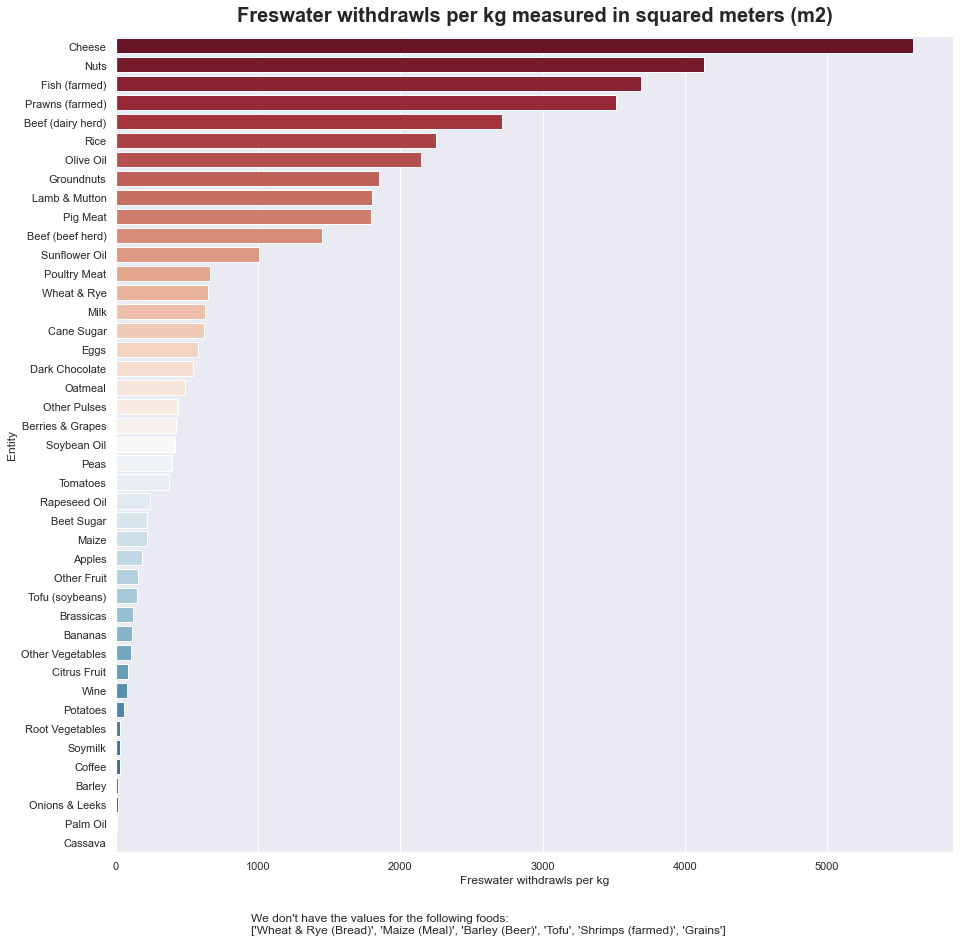

In [43]:
resources_plot("Freswater withdrawls per kg", df)
plt.show()

In [33]:
df["Freswater withdrawls per kg"]

Entity
Wheat & Rye (Bread)       NaN
Maize (Meal)              NaN
Barley (Beer)             NaN
Oatmeal                 482.4
Rice                   2248.4
Potatoes                 59.1
Cassava                   0.0
Cane Sugar              620.1
Beet Sugar              217.7
Other Pulses            435.7
Peas                    396.6
Nuts                   4133.8
Groundnuts             1852.3
Soymilk                  27.8
Tofu                      NaN
Soybean Oil             414.6
Palm Oil                  6.4
Sunflower Oil          1007.9
Rapeseed Oil            237.7
Olive Oil              2141.8
Tomatoes                369.8
Onions & Leeks           14.3
Root Vegetables          28.4
Brassicas               119.4
Other Vegetables        102.5
Citrus Fruit             82.7
Bananas                 114.5
Apples                  180.1
Berries & Grapes        419.6
Wine                     78.9
Other Fruit             153.5
Coffee                   25.9
Dark Chocolate          540.6
Bee